# **Тестовое на продуктового аналитика**

###**Часть 1**


1. Дайте определение ARPPU. В результате изменений в продукте ARPPU
снизился. Это хорошо или плохо? Отвечайте развернуто.


Average revenue per paying user - средняя выручка за одного платящего клиента, который пришел с помощью рекламы. Снижение данного показателя может говорить о некоторых факторах.

*   Первый сценарий может быть снижение выручки при том же количестве привлеченных пользователей и том же количестве платящих людей это плохой результат. Если выручка выросла и все пользователи остались, то хороший фактор
*   Второй сценарий может быть, что количество платящих пользователей стало больше, а средняя выручка осталась такой же это скорее положительный фактор, компания получает боьше средней выручки при большей количестве покупателей
*   Третий сценарий, когда средняя выручка растет это всегда хорошо, кроме того момента, когда платящих пользователей становится меньше, там уже надо считать сколько в среднем было выручки и сколько стало



2. Предположим, что в результате обновления дизайна продукта вы наблюдаете
увеличение среднего времени нахождения пользователей в приложении, но
уровень конверсии в покупку снизился. Как вы будете анализировать данное
изменение и какие рекомендации вы предложите команде продукта?

Возможно пользователи тратят больше времени на изучение интерфейса, так как он новый, но им тяжело становится ориентироваться в нем и не все желающих находят и/или не доходят до покупки. Нужно изучить сколько в среднем нужно времени пользователю на покупку и какое время он проводит в приложении. От результатов уже давать различные рекомендации    

Необходмио изучить как изменилась общая прибыль и средняя прибыль на одного пользователя. Если эти метрики выросли, то новый дизайн может подталкивать пользователя к более дорогим покупкам. Для принятия таких решений требуется больше времени, которое пользователи тратят в приложении.    

Если же эти метрики упали или не изменились значимо, то одно из объяснений - пользователи не могут разобраться в новом дизайне. Они тратят время в попытке понять, как соврешить покупку, но не могут это сделать. Стоит изучить метрику retention - если наша гипотеза верна, то пользователи не захотят возвращаться в приложение и retention упадет. Можно проверить, как часто пользователи заходят в помощь или обращаются в чат с поддержкой. Рост этих метрик так же подтвредит нашу гипотезу.  

Так же стоит изучить воронку - на каком именно переходе происходит паение конверсии. Возможно, именно на этом переходе новый дизайн вызывал проблемы.

Также можно еще порекомендовать изучить user journey - путь, который проходит пользователь до целевого действия. По сути воронка, совмещенная с графиком длительности перехода с этапа на этап. Это наглядно покажет этапы, где падает конверсия и взаимосвязь падения конверсии с увеличением времени перехода на этап. А там уже дальше изучать - была ли это техническая ошибка или нет. Дополнительно можно смотреть на изменение метрик удовлетворенности пользователей продуктом.

###**Часть 2**

В базе представлены данные об активности пользователей в обучающем игровом
приложении. Рассчитайте следующие метрики:

*   Retention и время, которое ученики проводят в приложении.
*   Как ученики переходят с уровня на уровень.
*   Метрики монетизации для всей когорты
*   Где ученики совершают больше всего платежей?
*   Где ученики совершают первые платежи?

Какие выводы вы можете сделать из расчетов:

*   Выберете 3-4 метрики, которые следует отслеживать в первую очередь?
*   Какие еще метрики следует отслеживать?
*   Какие данные стоит собирать дополнительно к уже собираемым, что бы
рассчитать предлагаемые тобою метрики?



####**1. Предобработка**

Подключение библиотек

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from plotly import graph_objects as go
from datetime import datetime, timedelta
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка данных в переменные

Ссылка на блоки данных  
https://disk.yandex.ru/d/6JtzSPpTe92ysA

In [4]:
levels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Мастерская/Приложение продуктовый аналитик/levels.csv')
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Мастерская/Приложение продуктовый аналитик/payments.csv')
sessions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Мастерская/Приложение продуктовый аналитик/sessions.csv')
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Мастерская/Приложение продуктовый аналитик/users.csv')

Рассмотрим данные по отдельности

#####**Levels**

In [5]:
display(levels.head(3))
print()
levels.info()

,Unnamed: 0,user_id,time,level
0,0,105194,2023-05-16 08:22:12.799003,2.0
1,1,105194,2023-05-16 08:26:42.405003,3.0
2,2,105194,2023-05-16 08:27:12.760003,4.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130623 entries, 0 to 130622
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  130623 non-null  int64  
 1   user_id     130623 non-null  int64  
 2   time        130623 non-null  object 
 3   level       130623 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB


Изучим столбец Unnamed: 0

In [6]:
#display(levels['Unnamed: 0'].head(10))

# Видимо это просто номер строчки, но последняя из них 130629, а количество строк 130622. Удалю ее из фрейма
levels = levels.drop(columns = ['Unnamed: 0'])

In [7]:
# Меняю тип данных в 'time' на datetime
levels['time'] = pd.to_datetime(levels['time'])

#Проверяю
display(levels.head(3))

print()
levels.info()

print('\n Проверка пропусков:')
display(levels.isna().sum()) # подсчёт пропусков

print('\n Проверка явных дубликатов:', levels.duplicated().sum())

,user_id,time,level
0,105194,2023-05-16 08:22:12.799003,2.0
1,105194,2023-05-16 08:26:42.405003,3.0
2,105194,2023-05-16 08:27:12.760003,4.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130623 entries, 0 to 130622
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  130623 non-null  int64         
 1   time     130623 non-null  datetime64[ns]
 2   level    130623 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 MB

 Проверка пропусков:


user_id    0
time       0
level      0
dtype: int64


 Проверка явных дубликатов: 0


Итог: были изучены данные из фрейма. Удалял столбец Unnamed: 0. Изменен тип данных у столбца со временем. Просмотр явных и неявных дубликатов. Их обнаружено не было

#####**Payments**

In [8]:
display(payments.head(3))
print()
payments.info()

,Unnamed: 0,user_id,pay_time,amt
0,1,107907,2023-05-29 17:08:18.890,0.400218
1,2,510991,2023-05-20 16:55:01.216,0.199608
2,3,294837,2023-05-19 01:41:55.970,0.199608



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  699 non-null    int64  
 1   user_id     699 non-null    int64  
 2   pay_time    699 non-null    object 
 3   amt         699 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 22.0+ KB


Столбец Unnamed: 0

In [9]:
#display(payments['Unnamed: 0'].head())

# Unnamed: 0 тоже самое, что с уровнями
payments = payments.drop(columns = ['Unnamed: 0'])

In [10]:
# Меняю тип данных в 'pay_time' на datetime
payments['pay_time'] = pd.to_datetime(payments['pay_time'])

#Проверяю
display(payments.head(3))

print()
payments.info()

print('\n Проверка пропусков:')
display(payments.isna().sum()) # подсчёт пропусков

print('\n Проверка явных дубликатов:', payments.duplicated().sum())

,user_id,pay_time,amt
0,107907,2023-05-29 17:08:18.890,0.400218
1,510991,2023-05-20 16:55:01.216,0.199608
2,294837,2023-05-19 01:41:55.970,0.199608



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   699 non-null    int64         
 1   pay_time  699 non-null    datetime64[ns]
 2   amt       699 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.5 KB

 Проверка пропусков:


user_id     0
pay_time    0
amt         0
dtype: int64


 Проверка явных дубликатов: 0


Итог: были изучены данные из фрейма. Удалял столбец Unnamed: 0. Изменен тип данных у столбца со временем. Просмотр явных и неявных дубликатов. Их обнаружено не было

#####**Sessions**

In [11]:
display(sessions.head(3))
print()
sessions.info()

# Unnamed: 0 тоже самое, что с уровнями
sessions = sessions.drop(columns = ['Unnamed: 0'])

,Unnamed: 0,user_id,close_time,open_time
0,0,875013,2023-05-16 05:17:59,2023-05-16 05:06:09
1,1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34
2,2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358004 entries, 0 to 358003
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  358004 non-null  int64 
 1   user_id     358004 non-null  int64 
 2   close_time  358004 non-null  object
 3   open_time   358004 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.9+ MB


In [12]:
# Меняю тип данных в 'close_time' и 'open_time' на datetime
sessions['close_time'] = pd.to_datetime(sessions['close_time'])
sessions['open_time'] = pd.to_datetime(sessions['open_time'])

# Меняю название столбцов
sessions.columns = ['user_id','session_end', 'session_start']

#Проверяю
display(sessions.head(3))

print()
sessions.info()

print('\n Проверка пропусков:')
display(sessions.isna().sum()) # подсчёт пропусков

print('\n Проверка явных дубликатов:', sessions.duplicated().sum())

,user_id,session_end,session_start
0,875013,2023-05-16 05:17:59,2023-05-16 05:06:09
1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34
2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358004 entries, 0 to 358003
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        358004 non-null  int64         
 1   session_end    358004 non-null  datetime64[ns]
 2   session_start  358004 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 8.2 MB

 Проверка пропусков:


user_id          0
session_end      0
session_start    0
dtype: int64


 Проверка явных дубликатов: 0


Итог: были изучены данные из фрейма. Удалял столбец Unnamed: 0. Изменен тип данных у столбца со временем. Просмотр явных и неявных дубликатов. Их обнаружено не было

#####**Users**

In [13]:
display(users.head(3))
print()
users.info()

# Unnamed: 0 тоже самое, что с уровнями
users = users.drop(columns = ['Unnamed: 0'])

,Unnamed: 0,user_id,reg_time
0,0,439127,2023-05-16 15:47:56.024
1,1,646681,2023-05-16 16:32:35.495
2,2,35136,2023-05-16 16:50:14.571



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31114 entries, 0 to 31113
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31114 non-null  int64 
 1   user_id     31114 non-null  int64 
 2   reg_time    31114 non-null  object
dtypes: int64(2), object(1)
memory usage: 729.4+ KB


In [14]:
# Меняю тип данных в 'reg_time' на datetime
users['reg_time'] = pd.to_datetime(users['reg_time'])

#Проверяю
display(users.head(3))

print()
users.info()

print('\n Проверка пропусков:')
display(users.isna().sum()) # подсчёт пропусков

print('\n Проверка явных дубликатов:', users.duplicated().sum())

,user_id,reg_time
0,439127,2023-05-16 15:47:56.024
1,646681,2023-05-16 16:32:35.495
2,35136,2023-05-16 16:50:14.571



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31114 entries, 0 to 31113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   31114 non-null  int64         
 1   reg_time  31114 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 486.3 KB

 Проверка пропусков:


user_id     0
reg_time    0
dtype: int64


 Проверка явных дубликатов: 0


Итог: были изучены данные из фрейма. Удалял столбец Unnamed: 0. Изменен тип данных у столбца со временем. Просмотр явных и неявных дубликатов. Их обнаружено не было

####**2. Блоки функций**


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv` — для визуализации LTV.

In [15]:
# Функция, которая на входе будет получать столбец таблицы, а на выходе давать дипазан нормальных значений (IQR)
def lim_normal_range(series_filtred, rnd = 1):
    # series_filtred - столбец датафрейма.
    # rnd - количество знаков, до которых буду округлять
    # По умолчанию до 1 знака после запятой

    q2=series_filtred.describe()[4]
    q3=series_filtred.describe()[6]
    min_column_name = series_filtred.describe()[3]
    max_column_name = series_filtred.describe()[7]

    x1 = round(max(min_column_name,  q2 - 1.5 * (q3 - q2) ), rnd)
    x2 = round(min(max_column_name,  q3 + 1.5 * (q3 - q2) ), rnd)
    return x1, x2

In [16]:
def get_profiles(sessions, payments, users, levels):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first'
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]').dt.month

    # Добавляем дату регистрации
    profiles = profiles.merge(users, on = 'user_id', how = 'left')

    # проверьте, есть ли ID пользователей из profiles в payments и добавляем payments
    profiles = profiles.merge(payments, on = 'user_id', how = 'left')
    profiles['payer'] = profiles['user_id'].isin(payments['user_id'].unique())
    profiles['payer'] = profiles[['payer']] * 1

    # Добавляем блок с уровнями
    objs = [profiles, levels]
    profiles = pd.concat(objs)

    # Меняем типы данных
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['reg_time'] = pd.to_datetime(profiles['reg_time'])
    profiles['time'] = pd.to_datetime(profiles['time'])
    profiles['pay_time'] = pd.to_datetime(profiles['pay_time'])

    return profiles

In [17]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [18]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('amt != 0').query('dt <= @last_suitable_acquisition_date')

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['pay_time'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='amt',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.show()

In [20]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [21]:
def plot_ltv_roi(ltv, ltv_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[horizon-1]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = 'dt'
    ltv_history.plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    plt.show()

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Молодец, что использовал материалы из материалов курса. Также здорово, что все функции заданы в одном месте.

####**3. Поиск метрик**

*   Retention и время, которое ученики проводят в приложении.
*   Как ученики переходят с уровня на уровень.
*   Метрики монетизации для всей когорты
*   Где ученики совершают больше всего платежей?
*   Где ученики совершают первые платежи?

In [22]:
# Получаем профили
profiles = get_profiles(sessions, payments, users, levels)

display(profiles.head(3))

,user_id,first_ts,dt,month,reg_time,pay_time,amt,payer,time,level
0,46,2023-05-16 09:26:37,2023-05-16,5.0,2023-05-16 09:26:37.646,NaT,NaN,0.0,NaT,NaN
1,58,2023-05-16 08:30:11,2023-05-16,5.0,2023-05-16 08:30:11.126,NaT,NaN,0.0,NaT,NaN
2,95,2023-05-16 21:12:02,2023-05-16,5.0,2023-05-16 21:12:02.376,NaT,NaN,0.0,NaT,NaN


####Retention и время, которое ученики проводят в приложении.

In [23]:
# Определим период изучения
min_date = users['reg_time'].min()
max_date = sessions['session_end'].max()
days_num = max_date.day - min_date.day
print(min_date, max_date)
print('Длительность:', days_num)

2023-05-11 02:01:36.784000 2023-05-30 17:18:17
Длительность: 19


Исследуемый прометужок с 11-05-2023 по 30-05-2023

In [55]:
# Какое время проводят пользователи
sessions['spend'] = sessions['session_end'] - sessions['session_start']
time_spend_info = sessions.copy()
time_spend_info_by_users = time_spend_info.groupby('user_id', as_index = True).agg({'spend':['sum','mean']}).reset_index()
time_spend_info_by_users.columns = ['user_id','spend_sum', 'spend_mean']
time_spend_info_by_users['minus'] = time_spend_info_by_users['spend_sum'] - time_spend_info_by_users['spend_mean']

time_spend_info_by_users['minus'] = time_spend_info_by_users['minus'].astype('int')
count_of_minus = time_spend_info_by_users.query('minus == 0').count()
time_spend_info_by_users = time_spend_info_by_users.drop(columns = 'minus')

display(time_spend_info_by_users.head(3))
print()
print('Пользователей зашедших один раз:', count_of_minus['minus'], 'или', round(count_of_minus['minus']/time_spend_info_by_users['user_id'].count() *100,2),  '% из', time_spend_info_by_users['user_id'].count())
print()
print('Медианное время проведенное одним пользователем в приложении:', round(time_spend_info_by_users['spend_sum'].dt.seconds.mean(),2), 'секунд или', round(time_spend_info_by_users['spend_sum'].dt.seconds.mean()/60,2), 'минут')
print()
time_spend_info_by_users['spend_sum'].describe()

,user_id,spend_sum,spend_mean
0,46,0 days 00:02:47,0 days 00:02:47
1,58,0 days 00:18:43,0 days 00:18:43
2,95,0 days 00:04:08,0 days 00:04:08



Пользователей зашедших один раз: 12570 или 40.46 % из 31070

Медианное время проведенное одним пользователем в приложении: 7622.91 секунд или 127.05 минут


count                        31070
mean     0 days 02:24:09.029803669
std      0 days 05:08:03.341109450
min                0 days 00:00:00
25%                0 days 00:06:11
50%                0 days 00:26:28
75%         0 days 02:17:47.750000
max                5 days 23:54:41
Name: spend_sum, dtype: object

40% пользователей зашли и вышли. По большей части 75% люди проводят чуть больше 2 часо в приложение. Медианное значение 127 минут

In [25]:
# Посчитаем пользователей по остальным данным
print('Количество уникальных пользователей в блоке данных users - ',users['user_id'].nunique())
print('Количество уникальных пользователей в блоке данных levels - ',levels['user_id'].nunique())

Количество уникальных пользователей в блоке данных users -  31114
Количество уникальных пользователей в блоке данных levels -  25545


Мы видим, что в блоках данных количество пользователей не совпадает:

1.   В блоке данных с активностями (sessions) их 31070.
2.   В блоке данных с пользователями (users) их 31114.
3.   В блоке данных с уровнями (levels) их 25545.

In [56]:
observation_date = datetime(2023, 5, 31).date()
horizon_date = 8

retention_raw, retention = get_retention(
    profiles, sessions, observation_date, horizon_date, ignore_horizon=True
)

retention

,cohort_size,0,1,2,3,4,5,6,7
dt,,,,,,,,,
2023-05-11,347,1.0,0.403458,0.328530,0.273775,0.250720,0.244957,0.216138,0.224784
2023-05-12,409,1.0,0.364303,0.315403,0.244499,0.220049,0.220049,0.205379,0.195599
2023-05-13,550,1.0,0.352727,0.274545,0.250909,0.223636,0.212727,0.183636,0.174545
2023-05-14,1203,1.0,0.239401,0.201164,0.190357,0.168745,0.157107,0.153782,0.138820
2023-05-15,4010,1.0,0.277556,0.227431,0.193766,0.178554,0.167082,0.151870,0.144638
2023-05-16,8327,1.0,0.269245,0.220608,0.193347,0.171010,0.155878,0.149754,0.143989
2023-05-17,7218,1.0,0.403020,0.333333,0.295927,0.265725,0.245913,0.232474,0.222084
2023-05-18,5465,1.0,0.457274,0.379506,0.337420,0.294053,0.274474,0.261116,0.254712
2023-05-19,1618,1.0,0.404203,0.347960,0.292954,0.281829,0.271323,0.255253,0.233004


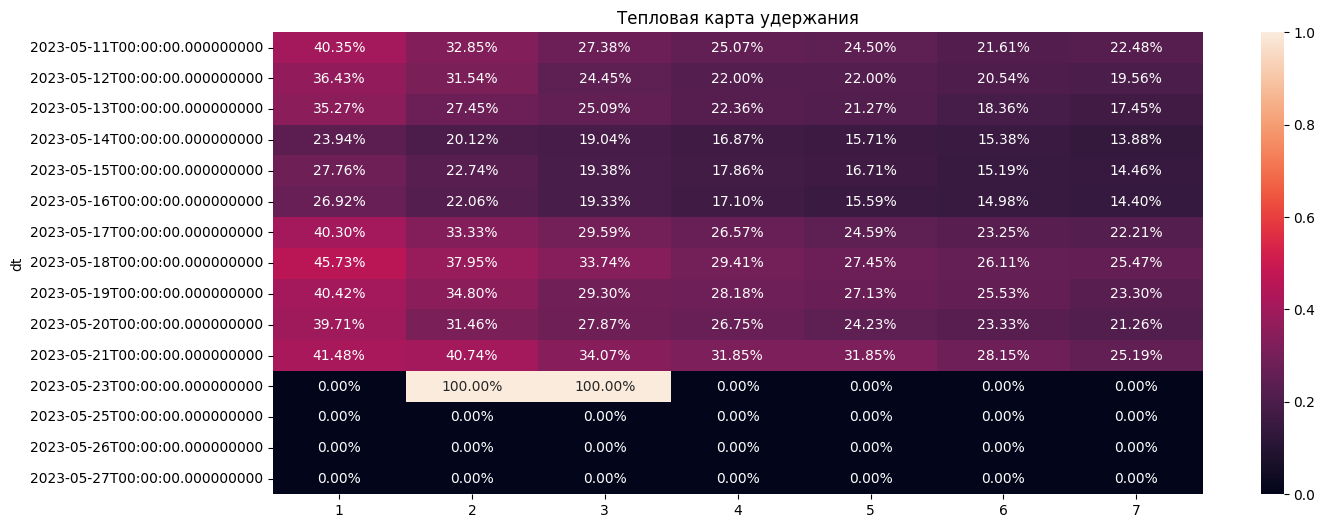

In [57]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

Есть два резких всплеска после 11 мая и после 18 мая. Самый большой показатель у тех кто пришел 18 мая. Также есть пользователи, которые приходили после 21 числа. Но выглядит это все очень странно. Либо действительно не было пользователей либо не было данных

Вывод:

*   Вычеслены профили и retention rate.
*   Составлен по retention rate график
*   Был выявлен изучаемый период с 11-05-2023 по 30-05-2023
*   В среднем люди проводят около 127 минут в приложении.
*   Около 40% пользователей зашли один раз
*   Когорта, которая была привлечена 21 чисоа показывает хорошие показазатели. После 21 числа люди перестали приходить


####Метрики монетизации для всей когорты

Посмотрим поподробнее на тех кто платит

Напишу функцию, которая на входе будет получать столбец таблицы, а на выходе давать диапозан нормальных значений (IQR)

Гистограмма без ограничений:


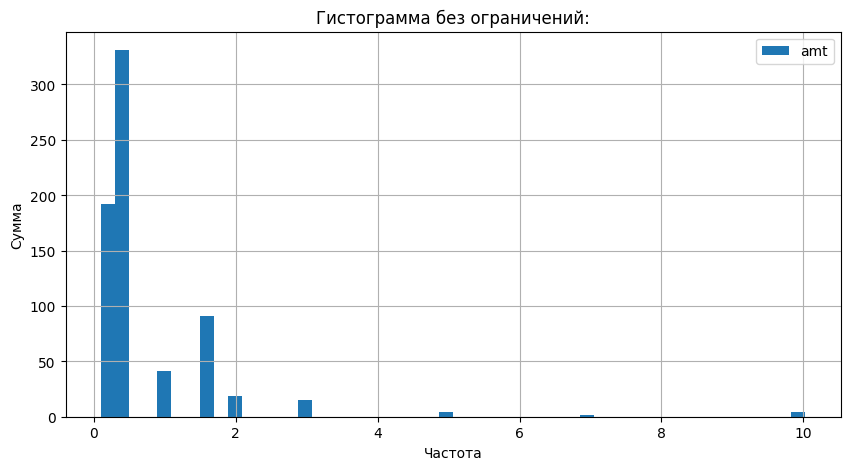

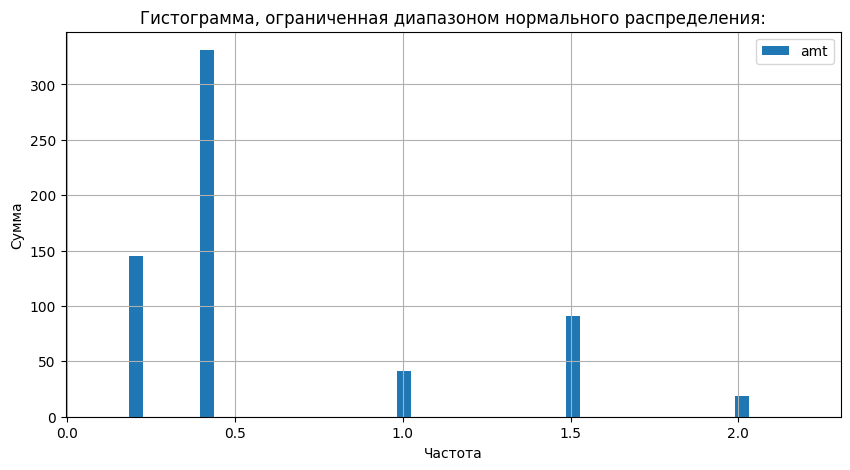

Диапазон нормального распределения: (0.1, 2.2)
Гистограмма, ограниченная диапазоном нормального распределения:


In [58]:
# Изучаемый столбец
column_name = 'amt'

# График без ограничений
print('Гистограмма без ограничений:')
payments.plot(
    kind='hist',
    y=column_name,
    bins=50,
    figsize=(10,5),
    grid=True
)
plt.xlabel('Частота')
plt.ylabel('Сумма')
plt.title('Гистограмма без ограничений:')
plt.show();

# График нормального распределения
payments.plot(
    kind='hist',
    y=column_name,
    bins=50,
    figsize=(10,5),
    grid=True,
    range = lim_normal_range(payments[column_name]) #ограничение через функцию
)
plt.xlabel('Частота')
plt.ylabel('Сумма')
plt.title('Гистограмма, ограниченная диапазоном нормального распределения:')
plt.show();

print('Диапазон нормального распределения:', lim_normal_range(payments[column_name]))
print('Гистограмма, ограниченная диапазоном нормального распределения:')

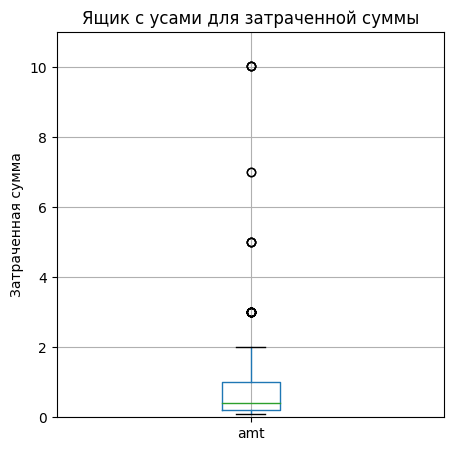

Числовое описание данных:


count    699.0
mean       0.7
std        1.0
min        0.1
25%        0.2
50%        0.4
75%        1.0
max       10.0
Name: amt, dtype: float64

In [59]:
# Диаграмма размаха (Ящик с усами):
payments.boxplot(column=column_name, figsize=(5,5))
plt.ylim(0, 11) #ставлю лимит, чтобы график был читаемый
plt.ylabel('Затраченная сумма')
showfliers=False
plt.title('Ящик с усами для затраченной суммы')
plt.show()
print('Числовое описание данных:')
round(payments[column_name].describe(),1)

По платящим клиентам видно, что средняя оплата была 0.7 у.е. Есть выбросы по оплате, не буду их убирать, так как это определенные траты у пользователей. Кто-то распорядился потратить больше, а кто-то меньше. В любом случае мы имеем факт

In [31]:
pays_total_info = profiles.pivot_table(index = 'payer', values = 'user_id', aggfunc = 'nunique').reset_index()
count_payer = pays_total_info[pays_total_info['payer'] == 1]['user_id'].sum()
share = round(pays_total_info[pays_total_info['payer'] == 1]['user_id'].sum()/pays_total_info[pays_total_info['payer'] == 0]['user_id'].sum() * 100, 2)
print('Количество платящих пользователей',count_payer, 'или', share ,'%' ,'от всех пользователей')

Количество платящих пользователей 312 или 1.01 % от всех пользователей


In [32]:
tops = payments[payments['amt'] > 0.7]
count_tops = tops['user_id'].nunique()

display(tops['user_id'].unique())

display(payments[payments['user_id'] == 759639])

array([511933, 931233, 535449, 225923, 141370, 759639, 591879, 951625,
       266013, 849875, 928417, 687340, 823940, 343094, 868827, 297717,
       898360, 115754, 567286, 711842, 895621])

,user_id,pay_time,amt
252,759639,2023-05-15 16:12:06.870,10.029531
253,759639,2023-05-15 16:12:26.385,10.029531
254,759639,2023-05-15 16:38:18.317,5.014264
255,759639,2023-05-15 16:46:40.125,7.019368
256,759639,2023-05-15 18:16:49.995,10.029531
257,759639,2023-05-15 19:43:30.813,10.029531


Видим, что пользователь номер 749639 тратит много денег и выбросы на графиках приходятся в основном на него.

Выведем информацию по самым прибыльным пользователям

In [62]:
high_users = payments[payments['amt'] > 0.7]['user_id'].unique()

# Создади df с богатыми пользователями
payments['is_in'] = payments['user_id'].isin(high_users) * 1
high_pays_df = payments.query('is_in == 1')
payments = payments.drop(['is_in'], axis = 1)

pays_pv_sum = high_pays_df.pivot_table(index = 'user_id', values = 'amt', aggfunc = 'sum').reset_index().fillna(0)
pays_pv_sum['amt'] = pays_pv_sum['amt'].round(2)

pays_mean = pays_pv_sum['amt'].mean().round(2)

print('Выведем информацию по ТОП-10 платящих пользователей')
display(pays_pv_sum.sort_values(by = 'amt', ascending = False).head(10))

print('Медианная трата среди платящих пользователей', round(payments['amt'].mean(), 2))
print('Медианная сумма платящего пользователя, которую он тратил за изучаемый период', pays_mean)

Выведем информацию по ТОП-10 платящих пользователей


,user_id,amt
44,759639,52.15
26,567286,27.06
27,582555,21.15
4,141370,15.44
59,931233,13.02
62,951625,12.23
48,845649,10.22
49,849875,9.53
21,511933,9.02
8,257708,8.72


Медианная трата среди платящих пользователей 0.72
Медианная сумма платящего пользователя, которую он тратил за изучаемый период 5.87


Медианная трата среди платящих равна 0.72 и медианная сумма у высоко-платящих равна 5.87

In [66]:
top_pays = payments.copy()
top_pays['top'] = top_pays['user_id'].isin(tops['user_id']) * 1

for i in range(len(top_pays)):
  if top_pays['top'][i] == 1:
    top_pays['top'][i] = 'Топ'
  else:
    top_pays['top'][i] = 'Не Топ'

grouped_tops = top_pays.groupby('top').agg({'amt':'sum'}).reset_index()
grouped_tops['amt'] = grouped_tops['amt'].round(2)

grouped_tops['share'] = (grouped_tops['amt'] / grouped_tops['amt'].sum() * 100).round(2)

display(grouped_tops)

<ipython-input-66-fdf1a20664a3>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,top,amt,share
0,Не Топ,297.4,59.31
1,Топ,204.0,40.69


In [67]:
pays_users = top_pays['user_id'].nunique()
share_tops = round(count_tops/pays_users * 100, 2)

print(f'Количество уникальных платящих пользователей {pays_users}, из них {count_tops} пользователь, являются самыми прибыльными.')
print(f'Это около {share_tops} процентов. Это количество пользователей приносит более 40% всей прибыли')

Количество уникальных платящих пользователей 312, из них 21 пользователь, являются самыми прибыльными.
Это около 6.73 процентов. Это количество пользователей приносит более 40% всей прибыли


In [69]:
# Сделаем круговую диаграмму по самых прибыльным пользователям
pie_1 = px.pie(
    grouped_tops,
    values="amt",
    names="top",
    title="Соотношение самых прибыльных пользователей и менее прибыльных",
    hole=0.3
)
pie_1.show()

In [74]:
pays_pv_sum = payments.pivot_table(index = 'user_id', values = 'amt', aggfunc = 'sum').reset_index().fillna(0)
pays_pv_sum['amt'] = pays_pv_sum['amt'].round(2)

print('Выведем информацию по ТОП-10 платящих пользователей')
display(pays_pv_sum.sort_values(by = 'amt', ascending = False).head(10))

pays_mean = pays_pv_sum['amt'].mean().round(2)

print('Медианная трата среди платящих пользователей', round(payments['amt'].mean(), 2))
print('Медианная сумма платящего пользователя, которую он тратил за изучаемый период', pays_mean)

Выведем информацию по ТОП-10 платящих пользователей


,user_id,amt
229,759639,52.15
162,567286,27.06
168,582555,21.15
44,141370,15.44
286,931233,13.02
296,951625,12.23
260,845649,10.22
246,799540,9.61
261,849875,9.53
145,511933,9.02


Медианная трата среди платящих пользователей 0.72
Медианная сумма платящего пользователя, которую он тратил за изучаемый период 1.61


<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Выше указано, что медиана, но расчет идет средних значений. Пожалуйста, подправь вывод или расчеты. Также обрати, пожалуйста, внимание на суммы - как только используется датафрейм df с дублирующими данными - значения сильно увеличиваются. Посмотри, пожалуйста, ниже на ТОП по исходным данным:

Если смотреть на весь блок данных, то видно что просела медианная затраченная сумма с почти 6 до почти 1.5, почти в 4 раза

#### Как ученики переходят с уровня на уровень.

In [75]:
print('Существующие уровни:', levels['level'].unique())

Существующие уровни: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21.]


In [76]:
# Выведем информацию по платежу и уровню
pays_and_levels = (payments
 .merge(levels, on = 'user_id')
 .merge(users, on = 'user_id')
 .query('pay_time >= time')
 .groupby(['user_id','pay_time','amt']).agg({'level':'max'}).reset_index()
)

display(pays_and_levels.head(3))
display(pays_and_levels['amt'].sum())

,user_id,pay_time,amt,level
0,199,2023-05-22 20:32:31.620,0.199608,5.0
1,199,2023-05-25 06:09:40.439,1.503577,9.0
2,199,2023-05-25 06:30:46.596,1.002050,9.0


481.3472885496184

При таком расчете мы теряем у user_id 759639 первые два платежа, которые он совершил до перехода на 2 уровень. Либо мы считаем без этих значений, либо мы берем их без присвоения ему уровня. Можно добавить эти данные вручную и присвоить ему 2 уровень

In [77]:
payments.query('user_id == 759639')

,user_id,pay_time,amt
252,759639,2023-05-15 16:12:06.870,10.029531
253,759639,2023-05-15 16:12:26.385,10.029531
254,759639,2023-05-15 16:38:18.317,5.014264
255,759639,2023-05-15 16:46:40.125,7.019368
256,759639,2023-05-15 18:16:49.995,10.029531
257,759639,2023-05-15 19:43:30.813,10.029531


In [78]:
pays_and_levels.query('user_id == 759639').head(30)

,user_id,pay_time,amt,level
495,759639,2023-05-15 16:38:18.317,5.014264,8.0
496,759639,2023-05-15 16:46:40.125,7.019368,8.0
497,759639,2023-05-15 18:16:49.995,10.029531,12.0
498,759639,2023-05-15 19:43:30.813,10.029531,14.0


In [79]:
pays_and_levels.loc[len(pays_and_levels.index)] = [759639,	'2023-05-15 16:12:06.870',	10.029531, 2]
pays_and_levels.loc[len(pays_and_levels.index)] = [759639,	'2023-05-15 16:12:26.385',	10.029531, 2]
pays_and_levels['pay_time'] = pd.to_datetime(pays_and_levels['pay_time'])

In [80]:
pays_and_levels.query('user_id == 759639').head(30)

,user_id,pay_time,amt,level
495,759639,2023-05-15 16:38:18.317,5.014264,8.0
496,759639,2023-05-15 16:46:40.125,7.019368,8.0
497,759639,2023-05-15 18:16:49.995,10.029531,12.0
498,759639,2023-05-15 19:43:30.813,10.029531,14.0
697,759639,2023-05-15 16:12:06.870,10.029531,2.0
698,759639,2023-05-15 16:12:26.385,10.029531,2.0


Добавлены вручную эти две строчки

In [81]:
# Проверим сумму трат пользователей
print('Тотал сумма в payments', payments['amt'].sum())
print('Тотал сумма в новом df', pays_and_levels['amt'].sum())

Тотал сумма в payments 501.4063511450382
Тотал сумма в новом df 501.40635054961837


Все верно

In [82]:
# Составим график по сумме трат пользователей на уровнях
levels_stat = pays_and_levels.pivot_table(index = ['user_id', 'level'], values = 'amt', aggfunc = 'sum').reset_index()
levels_stat_pays = pays_and_levels.groupby('level').agg({'user_id':'nunique', 'amt':'sum'}).reset_index()
levels_stat_pays['amt'] = round(levels_stat_pays['amt'], 2)

fig_1 = px.bar(levels_stat_pays, x = 'level', y = 'user_id',  text="amt")
fig_1.update_xaxes(tickangle = 45)
fig_1.update_layout(title = 'Количество пользователей на уровнях и их суммарные траты',
                   xaxis_title = 'Уровень',
                   yaxis_title = 'Количество уникальных пользователей')
fig_1.show()

Больше всего денег потратили пользоватлеи на 8 уровне, сумма около 127 у.е.

In [83]:
# Соберем информацию по пользователям, кто на какой уровень дошел, кто сколько потратил времени и денег
levs = levels.copy()
levels_stat_top = levels_stat.groupby('user_id').agg({'level':'max', 'amt': 'sum'}).reset_index()

# Получаем информацию о затраченном времени пользователей
sessions['spended'] = sessions['session_end'] - sessions['session_start']
sessions_max = sessions.pivot_table(index = 'user_id', values = 'spended', aggfunc = 'sum')

levs = levs.merge(sessions_max, on = 'user_id', how = 'left')
users_info_level = levs.groupby('user_id').agg({'level':'max', 'spended':'max'}).reset_index().sort_values(by = 'level', ascending = False)

# Связываем таблицу с уровнями и со временем
users_info_level = users_info_level.merge(levels_stat_top, on = 'user_id', how = 'left').drop(columns = ['level_y'])
users_info_level['amt'] = round(users_info_level['amt'].fillna(0), 2)

users_info_level_text = users_info_level.copy()
users_info_level_text.columns = ['Номер пользователя','Уровень','Потраченное время','Затраченные средства']
print('Выведем ТОП-10 пользователей по уровням')
users_info_level_text.head(10)

Выведем ТОП-10 пользователей по уровням


,Номер пользователя,Уровень,Потраченное время,Затраченные средства
0,853215,21.0,1 days 13:17:52,0.00
1,931233,20.0,2 days 00:36:35,13.02
2,711842,19.0,2 days 02:55:27,8.62
3,41607,19.0,1 days 14:08:24,0.00
4,759638,19.0,1 days 23:02:36,2.60
5,861603,18.0,0 days 23:03:15,0.80
6,347353,18.0,2 days 04:27:14,0.00
7,778687,17.0,0 days 16:42:14,0.00
8,421606,17.0,1 days 10:52:18,0.00
9,979220,17.0,1 days 17:40:59,0.00


In [84]:
# Статистика по уровням
users_info_level_grouped = users_info_level.groupby('level_x').agg({'user_id':'nunique','amt':'sum'}).reset_index()

users_info_level_grouped.columns = ['Уровень','Количество пользователей','Затраченные средства']
users_info_level_grouped['Затраченные средства'] = round(users_info_level_grouped['Затраченные средства'], 2)

fig_2 = px.bar(users_info_level_grouped, x = 'Уровень', y = 'Количество пользователей',  text='Затраченные средства')
fig_2.update_xaxes(tickangle = 45)
fig_2.update_layout(title = 'Количество пользователей на уровнях',
                   xaxis_title = 'Уровень',
                   yaxis_title = 'Количество уникальных пользователей')
fig_2.show()

Вывод:

1.   Единицы пользователей доходят до последних уровней.
2.   Чем больше людей тратят тем выше шанс перехода на более высокий уровень. Но не всегда. Первое место занимает пользователь номер 853215 и он не потратил никаких денег и занял первое место.
3.   В ТОП-10 только 40% пользователей потратили деньги.
4.   По времени затраченному нет закономерности по экономию времени за оплату. Есть пользователи, которые заплатили и провели в ней много времени. Тут скорее людям понравилось приложение, они тратят в нем свое время и свои деньги.
5.   Большее количество пользователей не продвинулись дальше первых уровней. Вторая точка это уровень 8.
6.   Больше всего пользователи потратили денег и остановились на уровне 8 с итоговой суммой 127.11

#### Где ученики совершают больше всего платежей?


In [48]:
levels_stat_count = pays_and_levels.groupby('level').agg({'amt':'count'}).reset_index()

fig_2 = px.bar(levels_stat_count, x = 'level', y = 'amt', text = 'amt')
fig_2.update_xaxes(tickangle = 45)
fig_2.update_layout(title = 'Количество платежей на уровнях',
                   xaxis_title = 'Уровень',
                   yaxis_title = 'Количество платежей')
fig_2.show()

Больше всего платежей происходит на 8 уровне 173 платеж был совершен

####Где ученики совершают первые платежи?

In [86]:
# Выведем информацию по определению уровня в первых платежах
first_pays = pays_and_levels.copy()
first_pays = first_pays.groupby('user_id').agg({'pay_time':'first', 'amt':'first','level':'first'}).reset_index()

display(first_pays.head(3))

,user_id,pay_time,amt,level
0,199,2023-05-22 20:32:31.620,0.199608,5.0
1,2586,2023-05-22 15:57:31.277,0.199608,6.0
2,4609,2023-05-20 19:43:45.878,0.099302,9.0


In [87]:
# Построим визуализацию первых платежей
levels_stat_first_count = first_pays.groupby('level').agg({'user_id':'nunique', 'amt':'mean'}).reset_index()
levels_stat_first_count['amt'] = round(levels_stat_first_count['amt'], 2)

fig_3 = px.bar(levels_stat_first_count, x = 'level', y = 'user_id', text = 'amt')
fig_3.update_xaxes(tickangle = 45)
fig_3.update_layout(title = 'Количество платежей на уровнях',
                   xaxis_title = 'Уровень',
                   yaxis_title = 'Количество платежей')
fig_3.show()

Чаще всего пользователи совершали первый платеж на 8 уровне. Средняя трата около 0.33 у.е. Если смотреть на данные, то видно, что первый платеж бывает разным, кт-то платит сразу на 2 уровне 1.7, а кто-от к 11 уровню решил заплатить 0.25

####Расчет LTV для платяжих пользователей

In [88]:
observation_date = max_date
horizon_date = 8

profiles['amt'] = profiles['amt'].fillna(0)

ltv_raw, ltv, ltv_history = get_ltv(
    profiles, payments, observation_date, horizon_date, ignore_horizon=False
)

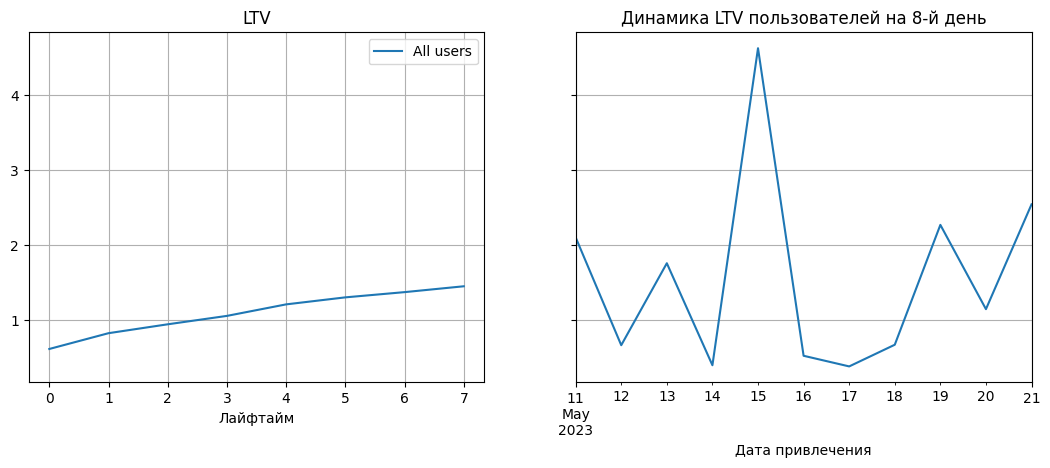

In [89]:
plot_ltv_roi(ltv, ltv_history, horizon_date)

По графику LTV по платящим пользователям видно, что показатель со временем растет и доходим до значения больше еденицы примерно за 2-3 дня. Причем показатель постянно растет, пользователи на протяжении всего жизненного цикла совершают покупки

#### Общий вывод

1.   У нас имеется в распоряжении информация  о пользоватлея приложения с 11-05-2023 по 30-05-2023.
2.   За это время было зарегистрированно 31070 из них 12570 или около 40% зашли
в него один раз и больше не заходили.
3.   Около 1% пользователей соглашаются заплатить деньги.
4.   Медианная трата среди платящих пользователей 0.72. Средний платеж составляет 0.4. Есть небльшая группа пользователей 21 человек, которые принесли 40% выручки
5.  В среднем люди тратят в приложении около 127 минут.
6.  В приложении 22 уровня. В ТОП-10 пользователей только 40% потратили деньги,
остальные без вложений дошли до высокого уровня.
В приложении нет зависимости от тех кто больше тратит денег,
тот до более высокого уровня поднимается.
Людям скорее нравится проводить время и они готовы совершить покупку.
7. Пользователи совершают первый платеж чаще всего на уровне 8. При этом есть пользователи, котрые тратят большую сумму на первых урвнях, а есть те кто на ппоследних тратит мало
8. До 8 уровня количество платежей небольшое, а вот начиная с 8 уровня график идет вверх и постепенно опускается на 12 уровне. На 8 уровне было потрачено больше всего денег 127
9. В целом по урвням можно сказать, что первые несклько уровней тестовые для пользвателей и ни дальше не идут. Второй тупик для них это уровень 8. Тут уже люди тратят деньги и проходят дальше, не обязательно платить, есть те кто и без потраченных денег прошли. До последних уровнях доходят единицы пользователей
10. По графику удержания видно,
что показатель за неделю опускается до 11% минимальное значение с 45% максимального,
что в целом хорошоий показатель.
11. По графику LTV по платящим пользователям видно, что показатель со временем растет и доходим до значения больше еденицы примерно за 2-3 дня. Причем показатель постянно растет, пользователи на протяжении всего жизненного цикла совершают покупки

### 4. Какие выводы вы можете сделать из расчетов:

*   Выберете 3-4 метрики, которые следует отслеживать в первую очередь?
*   Какие еще метрики следует отслеживать?
*   Какие данные стоит собирать дополнительно к уже собираемым, что бы рассчитать предлагаемые тобою метрики?*


Необходы данные по тому как эти люди нашли это приложение, возможно были траты на привлеченеие, тогда моно было бы рассчитать CAC и ROI.

Также данные по пользоватлем можно было бы собрать, например с какого устройства заходят, откуда они, чтобы понимать какая целевая аудитория.